In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline

In [385]:
pd.__version__

'1.0.5'

In [386]:
us = pd.read_csv('us.csv')
#usNew = us.head(223)
usNew = us.loc[(us['date']>'2020-01-01') & (us['date']<'2020-09-01')]
usNew


,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
219,2020-08-27,5884267,180730
220,2020-08-28,5930823,181740
221,2020-08-29,5975462,182611
222,2020-08-30,6008914,182985


In [387]:
print(us.head(10))

#print(us.tail())

         date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0
5  2020-01-26      5       0
6  2020-01-27      5       0
7  2020-01-28      5       0
8  2020-01-29      5       0
9  2020-01-30      6       0


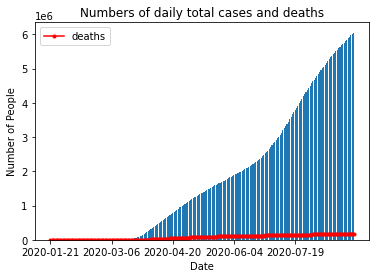

In [388]:

plt.figure()

plt.plot(usNew.date, usNew.deaths, 'r.-', label = "deaths")

x = usNew.date
#y = usNew.cases
plt.bar(x,usNew.cases,align='center')


plt.title('Numbers of daily total cases and deaths')
plt.ylabel('Number of People')
plt.xlabel('Date')
plt.xticks(usNew.date[::45])
plt.legend()

plt.show()

In [389]:
newCase = us.copy()
#df.diff()
newCase[['cases','deaths']] = us[['cases','deaths']].diff()
newCase[0:1] = us[0:1]
newCase.head(10)
#df.loc[0:235,['cases','deaths']] - df.loc[1:236,['cases','deaths']]




,date,cases,deaths
0,2020-01-21,1.0,0.0
1,2020-01-22,0.0,0.0
2,2020-01-23,0.0,0.0
3,2020-01-24,1.0,0.0
4,2020-01-25,1.0,0.0
5,2020-01-26,2.0,0.0
6,2020-01-27,0.0,0.0
7,2020-01-28,0.0,0.0
8,2020-01-29,0.0,0.0
9,2020-01-30,1.0,0.0


In [390]:
#newCase

#for i in enumerate(newCase):
#    newCase[i+1] = newCase[i+1] - newCase[i]
   
#newCase

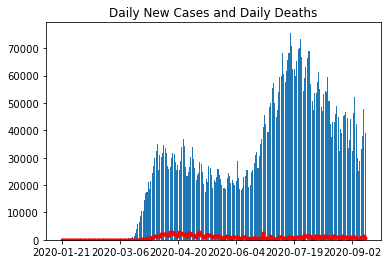

In [391]:
#plot the new dataframe
plt.figure()
x = us['date']

plt.plot(x,newCase.deaths, 'r.-', label = 'deaths')
plt.bar(x,newCase.cases, align='center')
plt.title('Daily New Cases and Daily Deaths')
plt.xticks(us.date[::45])
plt.show()


In [392]:
#7 days average

#dfRoll = pd.DataFrame(us)
#week_avg = dfRoll.rolling(7).mean()
#week_avg.head(10)


#seven days loop

seven_avg = us.copy()


for i in range(len(us) - 7):
    c = 0
    d = 0
    for j in range(7):
        c += us.iloc[i+6-j,1]
        d += us.iloc[i+6-j,2]
    seven_avg.iloc[i+6,1] = c/7.0
    seven_avg.iloc[i+6,2] = d/7.0
    
seven_avg.head(10)
#seven_avg


,date,cases,deaths
0,2020-01-21,1.000000,0.0
1,2020-01-22,1.000000,0.0
2,2020-01-23,1.000000,0.0
3,2020-01-24,2.000000,0.0
4,2020-01-25,3.000000,0.0
5,2020-01-26,5.000000,0.0
6,2020-01-27,2.571429,0.0
7,2020-01-28,3.142857,0.0
8,2020-01-29,3.714286,0.0
9,2020-01-30,4.428571,0.0


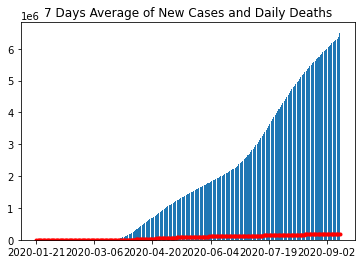

In [393]:
#plot 7 days average
plt.figure()
x = us['date']

plt.plot(seven_avg.deaths, 'r.-', label = 'deaths')
plt.bar(x,seven_avg.cases, align='center')
plt.title('7 Days Average of New Cases and Daily Deaths')
plt.xticks(us.date[::45])

plt.show()

In [394]:
#monthly average
#dfRollM = pd.DataFrame(us)
#month_avg = dfRollM.rolling(30).mean()
#month_avg

#dfRollM = pd.DataFrame(us)
#dfRollM = dfRollM.groupby(['Date']).mean()

diff = us.copy()
diff['date'] = pd.to_datetime(diff['date'])
diff['date'].dt.strftime('%Y %B %D').head()

a = diff.groupby(diff['date'].dt.strftime('%m %B')).mean()
sortedMonth = a.sort_values(by = 'date')
sortedMonth


,cases,deaths
date,,
01 January,3.727273e+00,0.000000
02 February,2.537931e+01,0.034483
03 March,3.533977e+04,655.548387
04 April,6.537234e+05,33016.500000
05 May,1.466185e+06,86943.580645
06 June,2.176239e+06,116630.800000
07 July,3.600715e+06,138961.387097
08 August,5.379234e+06,169672.064516
09 September,6.298916e+06,189101.000000


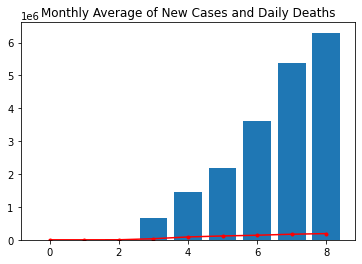

In [395]:
#plot monthly average
plt.figure()
x = [0,1,2,3,4,5,6,7,8]

plt.plot(x,sortedMonth['deaths'], 'r.-', label = 'deaths')
plt.bar(x,sortedMonth['cases'], label = 'cases')
plt.title('Monthly Average of New Cases and Daily Deaths')

#plt.xticks(us.date[::45])

plt.show()


In [396]:
#top and bottom 10 days of new cases

sortedCase = newCase.sort_values(by = ['cases'], ascending = False)
sortedCase[['date', 'cases']].head(10)


,date,cases
177,2020-07-16,75682.0
185,2020-07-24,73524.0
178,2020-07-17,70922.0
184,2020-07-23,70004.0
183,2020-07-22,69737.0
191,2020-07-30,69111.0
192,2020-07-31,69059.0
176,2020-07-15,68336.0
171,2020-07-10,68224.0
186,2020-07-25,66776.0


In [397]:
sortedCase[['date', 'cases']].tail(10)

,date,cases
26,2020-02-16,0.0
25,2020-02-15,0.0
13,2020-02-03,0.0
14,2020-02-04,0.0
24,2020-02-14,0.0
16,2020-02-06,0.0
17,2020-02-07,0.0
18,2020-02-08,0.0
19,2020-02-09,0.0
1,2020-01-22,0.0


In [398]:
#top and bottom 10 days of new deaths

sortedDeath = newCase.sort_values('deaths', ascending = False)

sortedDeath[['date', 'deaths']].head(10)



,date,deaths
85,2020-04-15,2752.0
106,2020-05-06,2708.0
84,2020-04-14,2705.0
91,2020-04-21,2672.0
99,2020-04-29,2514.0
156,2020-06-25,2466.0
98,2020-04-28,2394.0
92,2020-04-22,2371.0
86,2020-04-16,2349.0
87,2020-04-17,2289.0


In [399]:
sortedDeath[['date', 'deaths']].tail(10)

,date,deaths
23,2020-02-13,0.0
22,2020-02-12,0.0
21,2020-02-11,0.0
20,2020-02-10,0.0
34,2020-02-24,0.0
35,2020-02-25,0.0
19,2020-02-09,0.0
18,2020-02-08,0.0
17,2020-02-07,0.0
0,2020-01-21,0.0


In [400]:
#top 5 weeks with most increase case

sortedIncCase = seven_avg.sort_values('cases', ascending = False)

sortedIncCase[['date', 'cases']].head(5)



,date,cases
235,2020-09-12,6.504676e+06
234,2020-09-11,6.354659e+06
233,2020-09-10,6.319630e+06
232,2020-09-09,6.283965e+06
231,2020-09-08,6.247112e+06


In [401]:
#top 5 weeks with most increase deaths

sortedIncDeath = seven_avg.sort_values('deaths', ascending = False)
sortedIncDeath[['date', 'deaths']].head(5)

,date,deaths
235,2020-09-12,193551.000000
234,2020-09-11,190148.714286
233,2020-09-10,189412.285714
232,2020-09-09,188710.714286
231,2020-09-08,187985.857143


Text(0.5, 1.0, 'Monthly Average of New Cases and Daily Deaths')

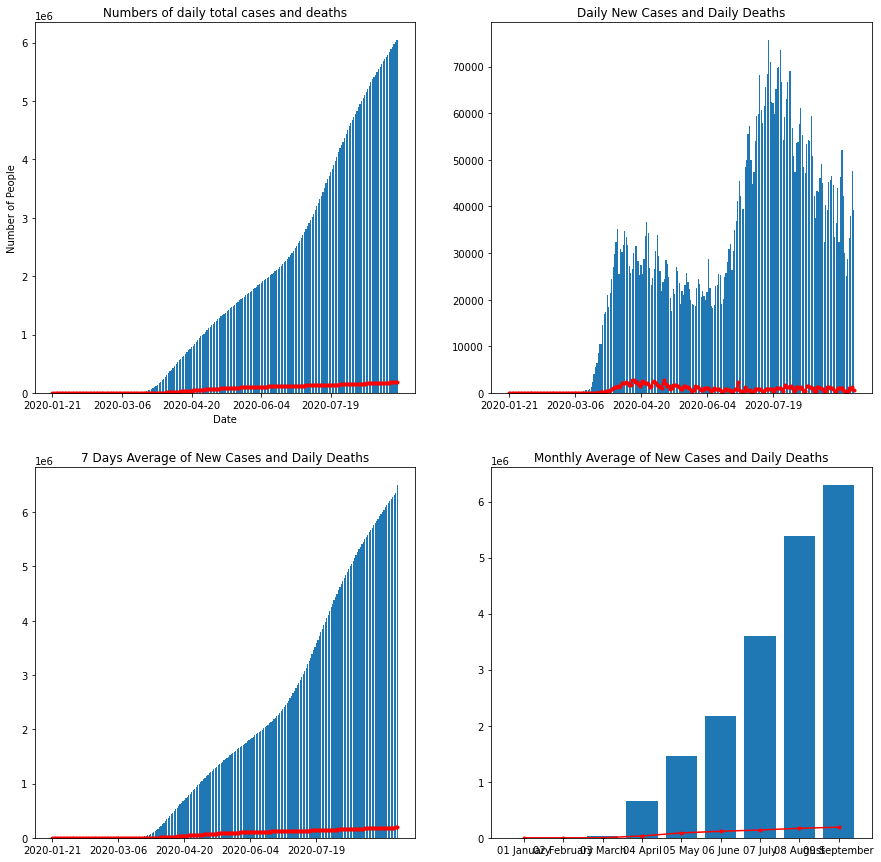

In [402]:
#Subplots

x = us['date']

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)

plt.bar(usNew.date,usNew.cases,align='center')
plt.plot(usNew.deaths, 'r.-', label = "deaths")


plt.title('Numbers of daily total cases and deaths')
plt.ylabel('Number of People')
plt.xlabel('Date')
plt.xticks(usNew.date[::45])


plt.subplot(2,2,2)
plt.plot(newCase.deaths, 'r.-', label = 'deaths')
plt.bar(x,newCase.cases, align='center')
plt.title('Daily New Cases and Daily Deaths')
plt.xticks(usNew.date[::45])



plt.subplot(2,2,3)
x = us['date']

plt.plot(seven_avg.deaths, 'r.-', label = 'deaths')
plt.bar(x,seven_avg.cases, align='center')
plt.title('7 Days Average of New Cases and Daily Deaths')
plt.xticks(usNew.date[::45])

plt.subplot(2,2,4)


x = [0,1,2,3,4,5,6,7,8]

plt.plot(sortedMonth['deaths'], 'r.-', label = 'deaths')
plt.bar(x,sortedMonth['cases'], label = 'cases')
plt.title('Monthly Average of New Cases and Daily Deaths')

